# TASK - 1

# Stock Prediction 

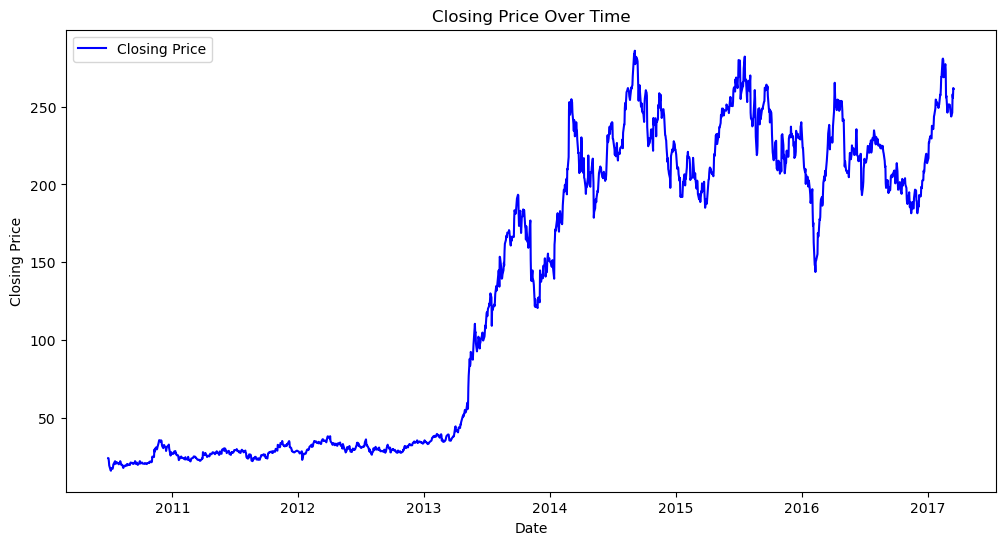

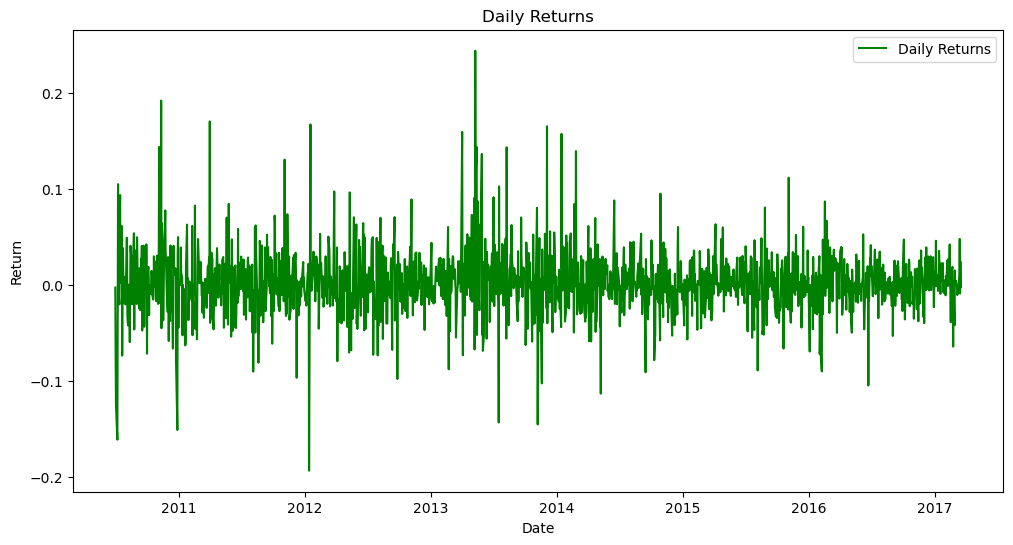

Mean Daily Return: 0.0020
Standard Deviation of Daily Return: 0.0329
Minimum Daily Return: -0.1933
Maximum Daily Return: 0.2440


In [5]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv("C:\\Users\\Narthana\\Downloads\\Tesla.csv - Tesla.csv.csv")  
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Step 3: Perform EDA

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.legend()
plt.show()

# Calculate and plot daily returns
daily_returns = data['Close'].pct_change().dropna()

plt.figure(figsize=(12, 6))
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.plot(daily_returns, label='Daily Returns', color='green')
plt.legend()
plt.show()

# Calculate basic statistics
mean_return = daily_returns.mean()
std_return = daily_returns.std()
min_return = daily_returns.min()
max_return = daily_returns.max()

# Print the statistics
print(f"Mean Daily Return: {mean_return:.4f}")
print(f"Standard Deviation of Daily Return: {std_return:.4f}")
print(f"Minimum Daily Return: {min_return:.4f}")
print(f"Maximum Daily Return: {max_return:.4f}")


In [7]:
# Get the number of rows and columns
num_rows, num_columns = data.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1692
Number of columns: 6


In [8]:
# Print the first few rows of the dataset
print(data.head())

                 Open   High        Low      Close    Volume  Adj Close
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001


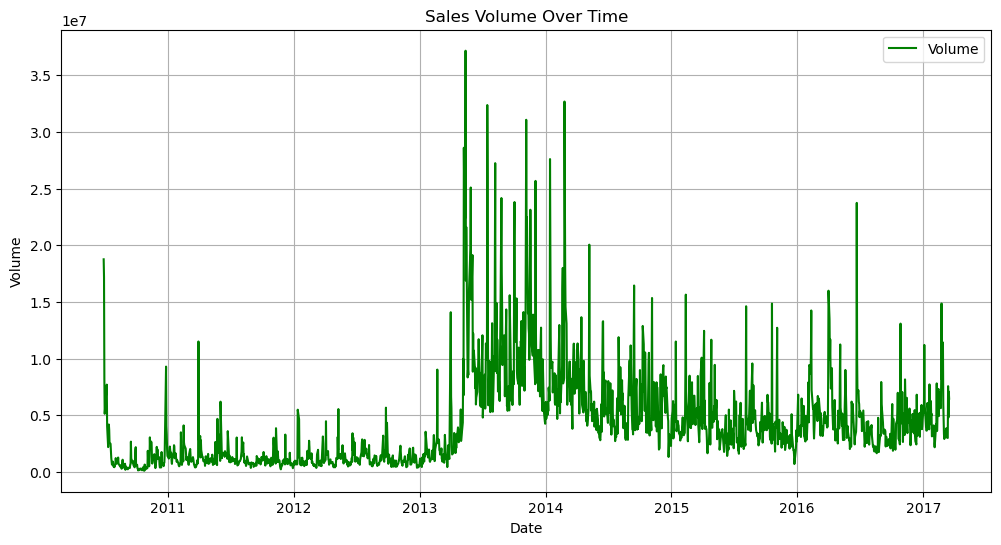

In [11]:
# Extract 'Date' and 'Volume' columns
sales_data = data[['Volume']]

# Plot the sales volume over time
plt.figure(figsize=(12, 6))
plt.title('Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.plot(sales_data, label='Volume', color='green')
plt.legend()
plt.grid(True)
plt.show()

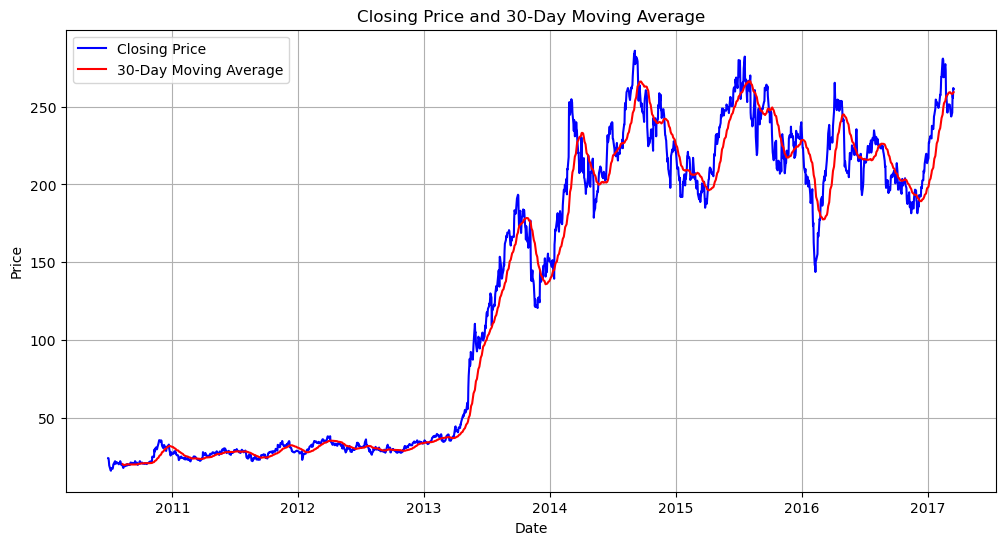

In [12]:
# Calculate the moving average of the closing price
window = 30  # Adjust the window size as needed
data['MovingAverage'] = data['Close'].rolling(window=window).mean()

# Plot the closing price and the moving average
plt.figure(figsize=(12, 6))
plt.title(f'Closing Price and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['MovingAverage'], label=f'{window}-Day Moving Average', color='red')
plt.legend()
plt.grid(True)

In [18]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate the standard deviation of daily returns as a measure of risk
daily_std = data['Daily_Return'].std()

# Calculate the annualized standard deviation by multiplying by the square root of the number of trading days in a year (usually 252)
annualized_std = daily_std * (252**0.5)

# Calculate the value at risk (VaR) for a given confidence level (e.g., 95%)
confidence_level = 0.95
z_score = -1.645  # Corresponding to a 5% loss for a one-tailed test
initial_investment = 10000  # Replace with your investment amount

# Calculate the VaR
var = initial_investment * annualized_std * z_score

# Print the results
print(f"Daily Standard Deviation (Risk): {daily_std:.4f}")
print(f"Annualized Standard Deviation: {annualized_std:.4f}")
print(f"Value at Risk (VaR) at {confidence_level*100}% confidence: ${var:.2f}")


Daily Standard Deviation (Risk): 0.0329
Annualized Standard Deviation: 0.5225
Value at Risk (VaR) at 95.0% confidence: $-8594.31


Epoch 1/100
1353/1353 - 5s - loss: 0.0252 - 5s/epoch - 3ms/step
Epoch 2/100
1353/1353 - 4s - loss: 5.3789e-04 - 4s/epoch - 3ms/step
Epoch 3/100
1353/1353 - 3s - loss: 5.0317e-04 - 3s/epoch - 2ms/step
Epoch 4/100
1353/1353 - 2s - loss: 4.1910e-04 - 2s/epoch - 2ms/step
Epoch 5/100
1353/1353 - 2s - loss: 3.6130e-04 - 2s/epoch - 2ms/step
Epoch 6/100
1353/1353 - 2s - loss: 3.1815e-04 - 2s/epoch - 2ms/step
Epoch 7/100
1353/1353 - 2s - loss: 3.2285e-04 - 2s/epoch - 2ms/step
Epoch 8/100
1353/1353 - 2s - loss: 3.0103e-04 - 2s/epoch - 2ms/step
Epoch 9/100
1353/1353 - 2s - loss: 3.0946e-04 - 2s/epoch - 2ms/step
Epoch 10/100
1353/1353 - 2s - loss: 3.0313e-04 - 2s/epoch - 2ms/step
Epoch 11/100
1353/1353 - 2s - loss: 2.9124e-04 - 2s/epoch - 2ms/step
Epoch 12/100
1353/1353 - 2s - loss: 3.1183e-04 - 2s/epoch - 2ms/step
Epoch 13/100
1353/1353 - 2s - loss: 3.0882e-04 - 2s/epoch - 2ms/step
Epoch 14/100
1353/1353 - 2s - loss: 3.1120e-04 - 2s/epoch - 2ms/step
Epoch 15/100
1353/1353 - 2s - loss: 2.9110e-04 

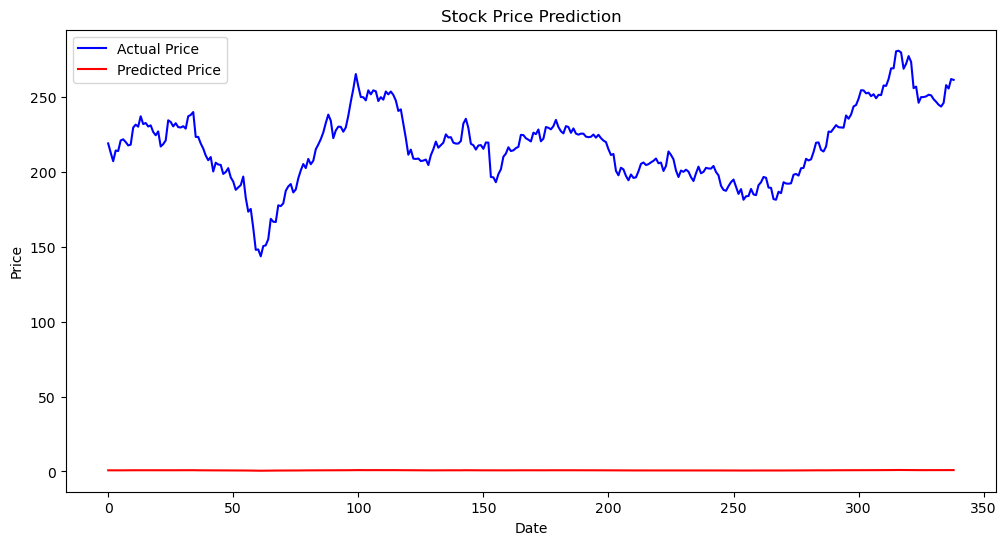

In [3]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Step 2: Load and preprocess the dataset
data = pd.read_csv("C:\\Users\\Narthana\\Downloads\\Tesla.csv - Tesla.csv.csv") 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data['Close'].values.reshape(-1, 1)  # We will use 'Close' prices for prediction
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Step 3: Split the dataset into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size], data[train_size:len(data)]

# Step 4: Create an LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 5: Train the model
model = create_lstm_model()

# Prepare the target data
target_data = np.roll(train_data, -1)  # Shift the data by one step
target_data[-1] = train_data[-1]  # Set the last element to match the original shape
target_data = target_data.reshape(-1, 1, 1)

model.fit(train_data, target_data, epochs=100, batch_size=1, verbose=2)

# Step 6: Make predictions
predictions = model.predict(test_data)

# Step 7: Evaluate the model
test_data = scaler.inverse_transform(test_data.reshape(-1, 1))
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(12,6))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(test_data, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.legend()
plt.show()


In [19]:
# Step 7: Evaluate the model
test_data = scaler.inverse_transform(test_data.reshape(-1, 1))
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Accuracy
accuracy = 100 - (rmse / np.mean(test_data) * 100)
print(f"Model Accuracy: {accuracy:.2f}%")

Mean Squared Error: 3511841910.489239
Root Mean Squared Error (RMSE): 59260.79572946383
Model Accuracy: -0.63%
